# Altro

In [1]:
'''delta_z = z_max - z_min #uguale

delta_r = (delta_z * c) / H0 #uguale

V = (1/3) * (Omega * delta_r**3) #uguale

r_cyl = 0.5
h_cyl = 2000 / H0
cyl_vol = np.pi * (r_cyl**2) * h_cyl #uguale

n_density_mean = N / V * cyl_vol

print ('n_density_mean =', n_density_mean)

sigma_mean = n_density_mean / (np.pi * r_cyl**2)

print ('sigma_mean =', sigma_mean)'''

"delta_z = z_max - z_min #uguale\n\ndelta_r = (delta_z * c) / H0 #uguale\n\nV = (1/3) * (Omega * delta_r**3) #uguale\n\nr_cyl = 0.5\nh_cyl = 2000 / H0\ncyl_vol = np.pi * (r_cyl**2) * h_cyl #uguale\n\nn_density_mean = N / V * cyl_vol\n\nprint ('n_density_mean =', n_density_mean)\n\nsigma_mean = n_density_mean / (np.pi * r_cyl**2)\n\nprint ('sigma_mean =', sigma_mean)"

# Intro

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
#from astropy.coordinates import Polygon
H_0 = 70 # km/s/Mpc
c = 3 * 10**5 # km/s

In [3]:
sdss = fits.open('SDSS_EnvCatalogue.fits')
data = sdss[1].data
header = sdss[1].header
print (header)
print (sdss[1].columns)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional table                            NAXIS1  =                  104 / width of table in bytes                        NAXIS2  =                19344 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group                                 TFIELDS =                   18 / number of columns                              EXTNAME = 'Joined  '           / table name                                     TTYPE1  = 'OBJID   '           / label for column 1                             TFORM1  = 'K       '           / format for column 1                            TTYPE2  = 'Ra      '           / label for column 2                             TFORM2  = 'D       '           / format 

# Part 1

## Task 1

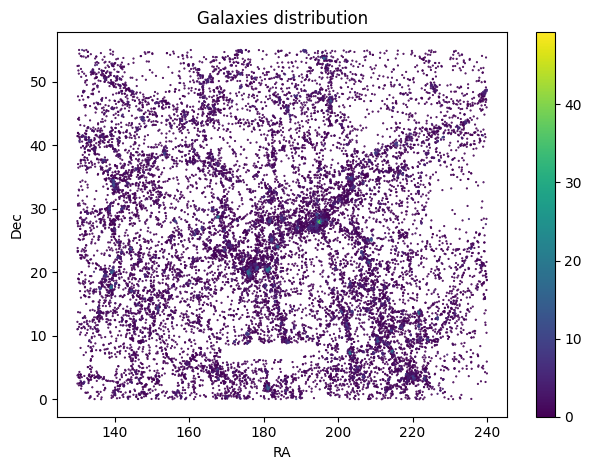

In [4]:
RA = data['RA']
Dec = data['Dec']
dens = data['dens_05']

plt.scatter (RA, Dec, s=0.3, c=dens, alpha=1)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('Galaxies distribution')
plt.tight_layout()
plt.colorbar()
plt.show()

In [5]:
z = data['redshift']

z_min = np.min(z)
z_max = np.max(z)

N = len(RA)

A = np.radians (min(RA))
B = np.radians (max(RA))
C = np.radians (min(Dec))
D = np.radians (max(Dec))

Omega = (np.sin(D)-np.sin(C)) * (B-A)

#den = Omega * ((z_max*c)/H_0)

#mean_density = N / den

print ('Omega =', Omega)
#print ('mean density =', mean_density)

Omega = 1.5720199028463313


In [6]:
z = data['redshift']

z_min = np.min(z)
z_max = np.max(z)

r_min = (z_min * c) / H_0
r_max = (z_max * c) / H_0

V = (1/3) * (Omega * r_max**3) - (1/3) * (Omega * r_min**3)

print ('V', V)

r_cyl = 0.5
h_cyl = 2000 / H_0
cyl_vol = np.pi * (r_cyl**2) * h_cyl

n_density_mean = (N / V) * cyl_vol

print ('n_density_mean =', n_density_mean) #mean of number density galaxies over the cylinders

sigma_mean = n_density_mean / (np.pi * r_cyl**2)

print ('sigma_mean =', sigma_mean) #mean of surface density galaxies over the cylinders

V 974369.4033392225
n_density_mean = 0.4454966909350748
sigma_mean = 0.5672240039471962


In [7]:
delta = dens / sigma_mean
print (np.mean (delta))

3.757822973103572


## Task 2

In [8]:
log_delta = np.log10(1 + delta)
print (log_delta)
print (np.max(log_delta))


[0.         0.6113454  1.09185919 ... 0.         0.78179432 1.13258749]
1.9434673286015451


In [9]:
bin1 = np.where (log_delta == 0.)
group2 = np.where (log_delta > 0.)
print (len(bin1[0]), 'galaxies with 0 overdensity')
print (len(group2[0]), 'galaxies with >0 overdensity')

pos_delta = log_delta[group2] #overdensity >0
perc_edges = np.percentile(pos_delta,  np.linspace (0, 100, 4))

bin2 = np.where ((pos_delta >= perc_edges[0]) & (pos_delta < perc_edges[1]))
bin3 = np.where ((pos_delta >= perc_edges[1]) & (pos_delta < perc_edges[2]))
bin4 = np.where ((pos_delta >= perc_edges[2]) & (pos_delta < perc_edges[3]))

delta_bins = [0., 0.01, perc_edges[0], perc_edges[1], perc_edges[2], perc_edges[3]]


10643 galaxies with 0 overdensity
8701 galaxies with >0 overdensity


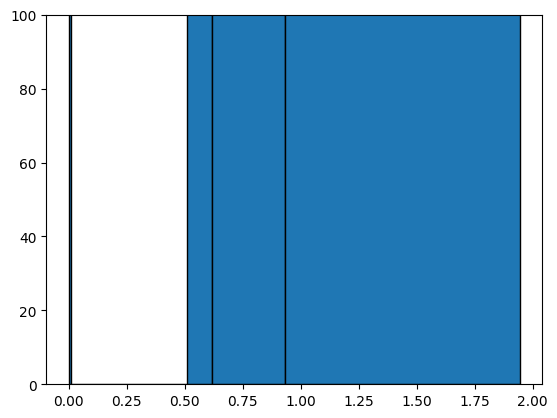

In [10]:
plt.hist (log_delta, bins = delta_bins, edgecolor = 'black')
plt.ylim (0, 100)
plt.show()

In [11]:
mass = data['mass']

u = data['up']
g = data['gp']

col_ug = u - g

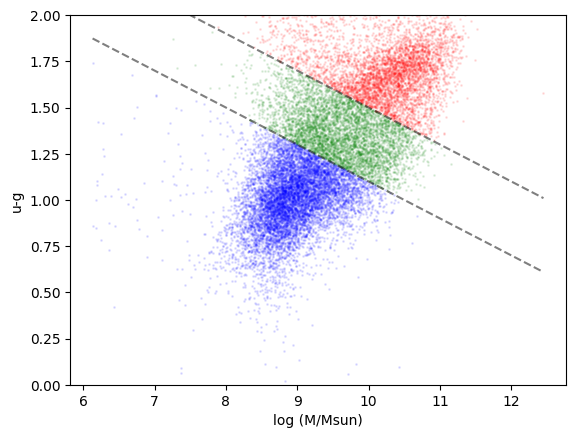

In [12]:
q1 = 3.5
q2 = 3.1
m = -0.2
x = np.linspace (min(mass), max(mass), 10)

def func (x, q, m):
    return q + x*m

blue_cloud = np.where (col_ug < func(mass, q2, m))
red_sequence = np.where (col_ug > func(mass, q1, m))
green_valley = np.where ((col_ug > func(mass, q2, m)) & (col_ug < func(mass, q1, m)))

#plt.scatter (mass, col_ug, s=1, alpha=0.1, c='black')
plt.plot (x, func(x, q1, m), c='black', linestyle = 'dashed', alpha = 0.5)
plt.plot (x, func(x, q2, m), c='black', linestyle = 'dashed', alpha = 0.5)
plt.scatter (mass[blue_cloud], col_ug[blue_cloud], s=1, alpha=0.1, c='blue')
plt.scatter (mass[red_sequence], col_ug[red_sequence], s=1, alpha=0.1, c='red')
plt.scatter (mass[green_valley], col_ug[green_valley], s=1, alpha=0.1, c='green')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

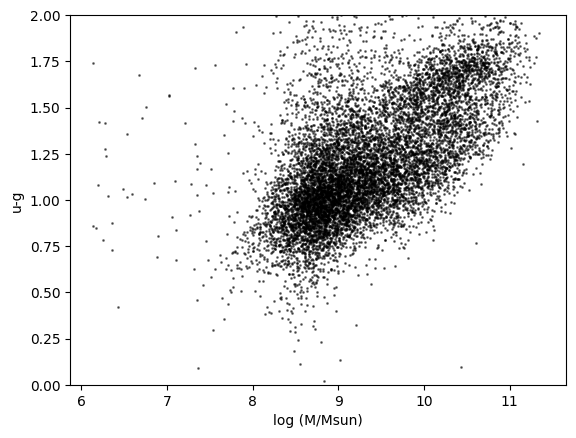

In [13]:
plt.scatter (mass [bin1], col_ug [bin1], s=1, alpha=0.5, c='black')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

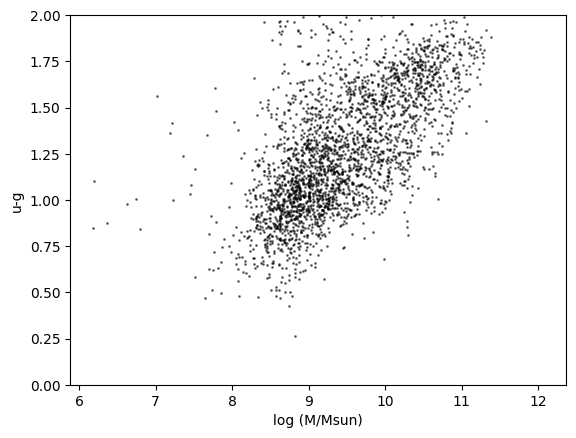

In [14]:
plt.scatter (mass [bin2], col_ug [bin2], s=1, alpha=0.5, c='black')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

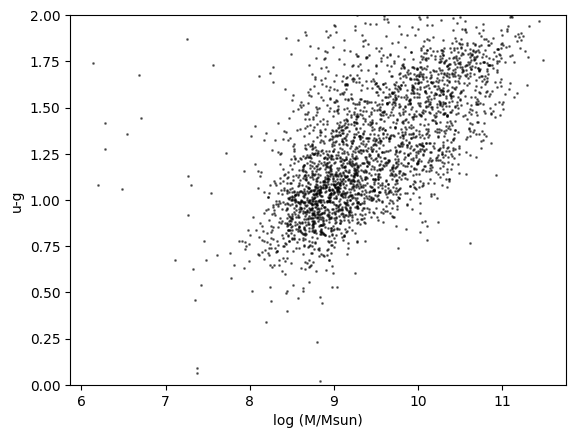

In [15]:
plt.scatter (mass [bin3], col_ug [bin3], s=1, alpha=0.5, c='black')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

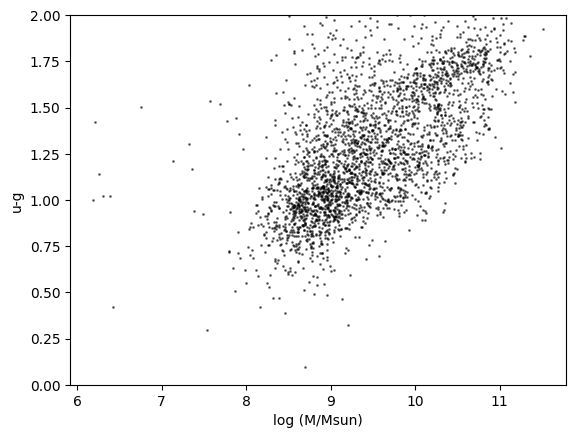

In [16]:
plt.scatter (mass [bin4], col_ug [bin4], s=1, alpha=0.5, c='black')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

## Task 3

In [17]:
#FARE ISTOGRAMMA

blue_iso = np.intersect1d (blue_cloud, bin1)
red_iso = np.intersect1d (red_sequence, bin1)
green_iso = np.intersect1d (green_valley, bin1)

print ('ISOLATED GALAXIES')
print (100*len(blue_iso)/len(bin1[0]), 'blue galaxies')
print (100*len(red_iso)/len(bin1[0]), 'red galaxies')
print (100*len(green_iso)/len(bin1[0]), 'green galaxies')
print ('\n')

blue_low = np.intersect1d (blue_cloud, bin2)
red_low = np.intersect1d (red_sequence, bin2)
green_low = np.intersect1d (green_valley, bin2)

print ('LOW DENSITY GALAXIES')
print (100*len(blue_low)/len(bin2[0]), 'blue galaxies')
print (100*len(red_low)/len(bin2[0]), 'red galaxies')
print (100*len(green_low)/len(bin2[0]), 'green galaxies')
print ('\n')

blue_med = np.intersect1d (blue_cloud, bin3)
red_med = np.intersect1d (red_sequence, bin3)
green_med = np.intersect1d (green_valley, bin3)

print ('MEDIUM DENSITY GALAXIES')
print (100*len(blue_med)/len(bin3[0]), 'blue galaxies')
print (100*len(red_med)/len(bin3[0]), 'red galaxies')
print (100*len(green_med)/len(bin3[0]), 'green galaxies')
print ('\n')

blue_high = np.intersect1d (blue_cloud, bin4)
red_high = np.intersect1d (red_sequence, bin4)
green_high = np.intersect1d (green_valley, bin4)

print ('HIGH DENSITY GALAXIES')
print (100*len(blue_high)/len(bin4[0]), 'blue galaxies')
print (100*len(red_high)/len(bin4[0]), 'red galaxies')
print (100*len(green_high)/len(bin4[0]), 'green galaxies')
print ('\n')


ISOLATED GALAXIES
56.158977731842526 blue galaxies
20.52992577280842 red galaxies
23.311096495349055 green galaxies


LOW DENSITY GALAXIES
47.99721351445489 blue galaxies
27.83002438174852 red galaxies
24.172762103796586 green galaxies


MEDIUM DENSITY GALAXIES
48.122866894197955 blue galaxies
26.757679180887372 red galaxies
25.119453924914676 green galaxies


HIGH DENSITY GALAXIES
45.98137288720248 blue galaxies
27.69920662297344 red galaxies
26.319420489824076 green galaxies




# Part 2

In [18]:
spec2 = fits.open('Spec_N4330_region11 (1).fits')
spec2flx = spec2[0].data
spec2err = spec2[1].data
spec2wav = spec2[2].data

print (spec2flx.shape)
print (spec2err.shape)
print (spec2wav.shape)


table = fits.open('Phot_N4330 (1).fits')
tabdata = table[1].data

print (tabdata.columns)

(2400,)
(2400,)
(2400,)
ColDefs(
    name = 'id'; format = 'K'; null = -9223372036854775808
    name = 'z_best'; format = 'D'
    name = 'dl'; format = 'D'
    name = 'f_FUV'; format = 'D'
    name = 'e_FUV'; format = 'D'
    name = 'f_NUV'; format = 'D'
    name = 'e_NUV'; format = 'D'
    name = 'f_U'; format = 'D'
    name = 'e_U'; format = 'D'
    name = 'f_G'; format = 'D'
    name = 'e_G'; format = 'D'
    name = 'f_I'; format = 'D'
    name = 'e_I'; format = 'D'
    name = 'f_Z'; format = 'D'
    name = 'e_Z'; format = 'D'
    name = 'f_IRAC1'; format = 'D'
    name = 'e_IRAC1'; format = 'D'
    name = 'f_IRAC4'; format = 'D'
    name = 'e_IRAC4'; format = 'D'
    name = 'f_PACS100'; format = 'D'
    name = 'e_PACS100'; format = 'D'
)


In [19]:
mean_flux = np.mean(spec2flx)

#Read model
modhdu = fits.open('Models_N4330_region11 (1).fits')
#How many extensions
Next = modhdu[0].header['NEXT']
modwave = modhdu[0].data
chi2 = np.zeros (Next)
consts = np.zeros (Next)
for ext in np.arange(1,Next+1):
    thisext = modhdu[ext]
    thishead = thisext.header
    modspec = thisext.data
    Qtau = thishead['TRUNCTAU']
    Qage = thishead['TRUNCAGE']
    photarr = np.array((thishead['MODFUV'],thishead['MODNUV'],\
    thishead['MODU'],thishead['MODG'],\
    thishead['MODI'],thishead['MODZ'], \
    thishead['MODIR1'],thishead['MODIR4']))

    mean_mod = np.mean(modspec.flatten())

    const = mean_flux / mean_mod
    consts[ext-1] = const
    modspec2 = modspec * const

    chi2[ext-1] = np.sum((spec2flx - modspec2)**2 / (spec2err**2))

## Task 1

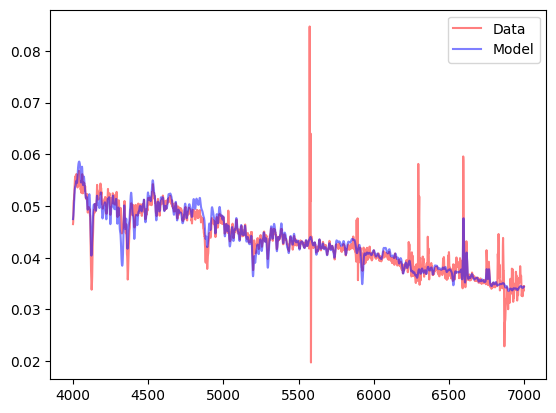

In [20]:
plt.plot (spec2wav, spec2flx, c='red', alpha=0.5, label='Data')
plt.plot (modwave.flatten(), modspec2.flatten(), c='blue', alpha=0.5, label='Model')
plt.legend()
plt.show()

## Task 2

In [21]:
print (chi2)

best = np.where(chi2 == np.min(chi2))[0][0]

print (best)

[  8090.42857495   5110.19281395   6030.18385313   6713.16821335
   7019.67131361   7194.49405676   7269.11641273   7373.04745785
   7543.32347442   8086.25683644   8636.55379626  48411.86716229
  17277.7024286    7631.73921264   5302.3598406    5196.9742679
   6117.45655335   7074.41837804   7317.53720313   7496.57472927
   8034.65300793   8590.86270143  99793.03151585  50368.046171
  24645.58483732  12513.630934     7378.36624551   5170.86986831
   6337.72794349   7058.55921112   7390.37275553   7977.53922422
   8541.6939015  138714.20601092  86518.60980911  51996.57503672
  30531.78941646  17955.40999917   7489.56756109   5448.59169637
   6506.01770181   7136.66073555   7902.95399596   8487.25290042
 166239.21058516 116802.58268418  79882.61694896  53373.27128244
  35074.37153612  15173.32465977   5543.33180072   5768.16324415
   6669.85254933   7791.93528178   8425.05036725 184906.83532916
 139383.15841311 103176.40336583  75083.82835247  53850.15843834
  26998.79906756   8024.8895

In [22]:
best_ext = modhdu[best + 1]
best_Qage = best_ext.header["TRUNCAGE"]
best_Qtau = best_ext.header["TRUNCTAU"]

print ('Best Q age', best_Qage, 'Myr')
print ('Best Q tau', best_Qtau)


Best Q age 75 Myr
Best Q tau 20


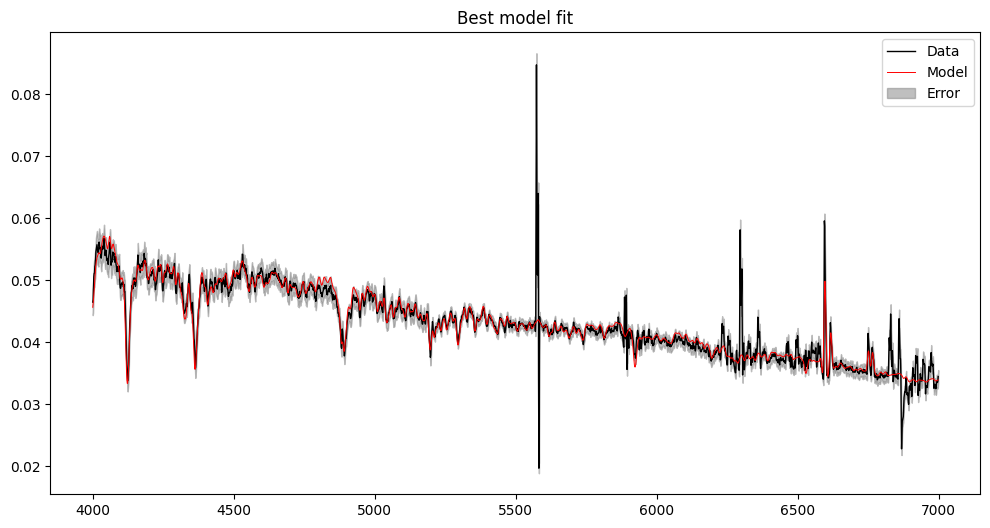

In [23]:
best_spec = best_ext.data
plt.figure(figsize=(12,6))
plt.plot (spec2wav, spec2flx, c='black', alpha=1, label='Data', linewidth=1)
plt.plot (modwave.flatten(), consts[best]*best_spec.flatten(), c='red', alpha=1, label='Model', linewidth=0.7)
#plt.plot (spec2wav, spec2flx+spec2err, c='gray', alpha=1, linewidth=0.7)
#plt.plot (spec2wav, spec2flx-spec2err, c='gray', alpha=1, linewidth=0.7)
plt.fill_between (spec2wav, spec2flx-spec2err, spec2flx+spec2err, color='gray', alpha=0.5, label='Error')
plt.title ('Best model fit')
plt.legend()
plt.show()

In [24]:
print (f" Reduced chi2: {chi2.min()/len(spec2flx):.3f}")

 Reduced chi2: 2.129


# Task 3

In [25]:
print (tabdata.columns)

ColDefs(
    name = 'id'; format = 'K'; null = -9223372036854775808
    name = 'z_best'; format = 'D'
    name = 'dl'; format = 'D'
    name = 'f_FUV'; format = 'D'
    name = 'e_FUV'; format = 'D'
    name = 'f_NUV'; format = 'D'
    name = 'e_NUV'; format = 'D'
    name = 'f_U'; format = 'D'
    name = 'e_U'; format = 'D'
    name = 'f_G'; format = 'D'
    name = 'e_G'; format = 'D'
    name = 'f_I'; format = 'D'
    name = 'e_I'; format = 'D'
    name = 'f_Z'; format = 'D'
    name = 'e_Z'; format = 'D'
    name = 'f_IRAC1'; format = 'D'
    name = 'e_IRAC1'; format = 'D'
    name = 'f_IRAC4'; format = 'D'
    name = 'e_IRAC4'; format = 'D'
    name = 'f_PACS100'; format = 'D'
    name = 'e_PACS100'; format = 'D'
)


In [26]:
phot_tab2 = tabdata [3]
print (phot_tab2)

phot2 = np.zeros (8)
phot2_err = np.zeros (8)

for i in range (len(phot2)):
    phot2[i] = phot_tab2[3+(2*i)]
    phot2_err[i] = phot_tab2[4+(2*i)]
print (phot2)
print (phot2_err)

(11, 0.0046705, 16.5, 0.145, 0.07, 0.219, 0.01, 0.848, 0.05, 1.863, 0.06, 3.27477, 0.11277, 3.73129, 0.131, 2.068, 0.052, 3.326, 0.084, 58.3, 12.34)
[0.145   0.219   0.848   1.863   3.27477 3.73129 2.068   3.326  ]
[0.07    0.01    0.05    0.06    0.11277 0.131   0.052   0.084  ]


In [27]:
chi2_phot = np.zeros(Next)

for ext in np.arange(1,Next+1):
    thisext = modhdu[ext]
    thishead = thisext.header
    modspec = thisext.data
    photarr = np.array((thishead['MODFUV'],thishead['MODNUV'],\
    thishead['MODU'],thishead['MODG'],\
    thishead['MODI'],thishead['MODZ'], \
    thishead['MODIR1'],thishead['MODIR4']))

    chi2_phot[ext-1] = np.sum((photarr - phot2)**2 / (phot2_err**2))

In [32]:
print (chi2_phot/8)

ind_min = np.argmin(chi2_phot/8)

print (f'Reduced chi2: {(chi2_phot/8)[ind_min]:.3f}')

print (ind_min)

[4.34304757e+01 1.40319830e+00 1.19620481e+01 2.80678534e+01
 4.29460291e+01 6.74578410e+01 1.03598204e+02 1.29568080e+02
 1.49513243e+02 1.87202675e+02 2.15309939e+02 3.22318654e+02
 7.12695574e+01 8.22984012e+00 3.42845485e+00 1.57190603e+01
 4.72879491e+01 9.39369186e+01 1.23731259e+02 1.45274175e+02
 1.84432250e+02 2.13157791e+02 7.14062699e+02 2.73558754e+02
 8.88357212e+01 2.06862071e+01 3.92091956e+00 2.16355741e+01
 7.76391187e+01 1.14844860e+02 1.39725307e+02 1.81411721e+02
 2.10912183e+02 1.05786483e+03 5.26638699e+02 2.42865347e+02
 9.94651957e+01 3.34995548e+01 6.55171145e+00 5.51955343e+01
 1.01207847e+02 1.31706254e+02 1.77925939e+02 2.08523784e+02
 1.33259013e+03 7.70800574e+02 4.26010938e+02 2.21557506e+02
 1.05554391e+02 1.63632024e+01 3.21815368e+01 8.24874563e+01
 1.19921441e+02 1.73631222e+02 2.05929972e+02 1.53556959e+03
 9.74052049e+02 5.99467784e+02 3.55587696e+02 2.00924283e+02
 5.16740156e+01 1.61686921e+01 6.04149888e+01 1.02919240e+02
 1.67140788e+02 2.027056

Q age: 75 Myr, Q tau: 20


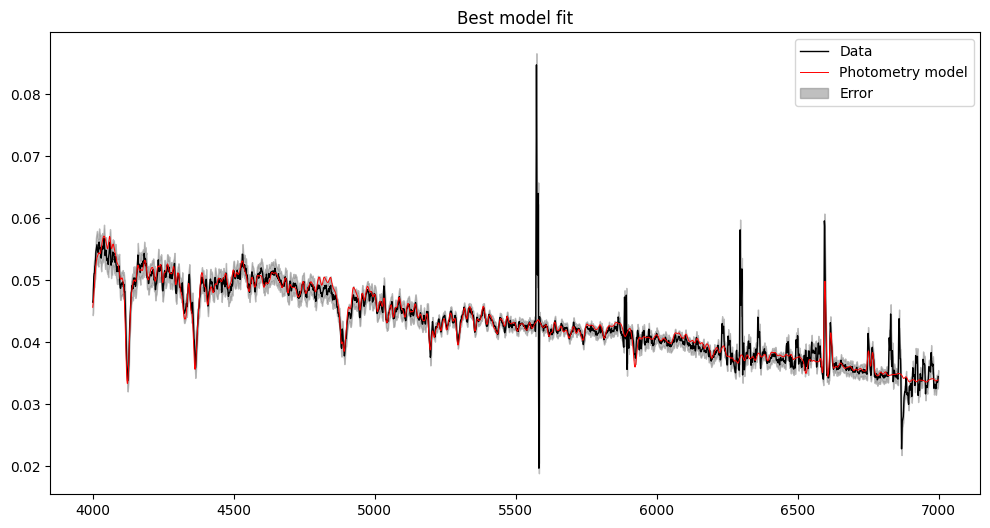

In [34]:
best_ext_phot = modhdu[ind_min+1]

Qage_phot = best_ext_phot.header['TRUNCAGE']
Qtau_phot = best_ext_phot.header['TRUNCTAU']

print (f'Q age: {Qage_phot} Myr, Q tau: {Qtau_phot}')

best_spec_phot = best_ext_phot.data
plt.figure(figsize=(12,6))
plt.plot (spec2wav, spec2flx, c='black', alpha=1, label='Data', linewidth=1)
plt.plot (modwave.flatten(), consts[ind_min]*best_spec_phot.flatten(), c='red', alpha=1, label='Photometry model', linewidth=0.7)
#plt.plot (spec2wav, spec2flx+spec2err, c='gray', alpha=1, linewidth=0.7)
#plt.plot (spec2wav, spec2flx-spec2err, c='gray', alpha=1, linewidth=0.7)
plt.fill_between (spec2wav, spec2flx-spec2err, spec2flx+spec2err, color='gray', alpha=0.5, label='Error')
plt.title ('Best model fit')
plt.legend()
plt.show()

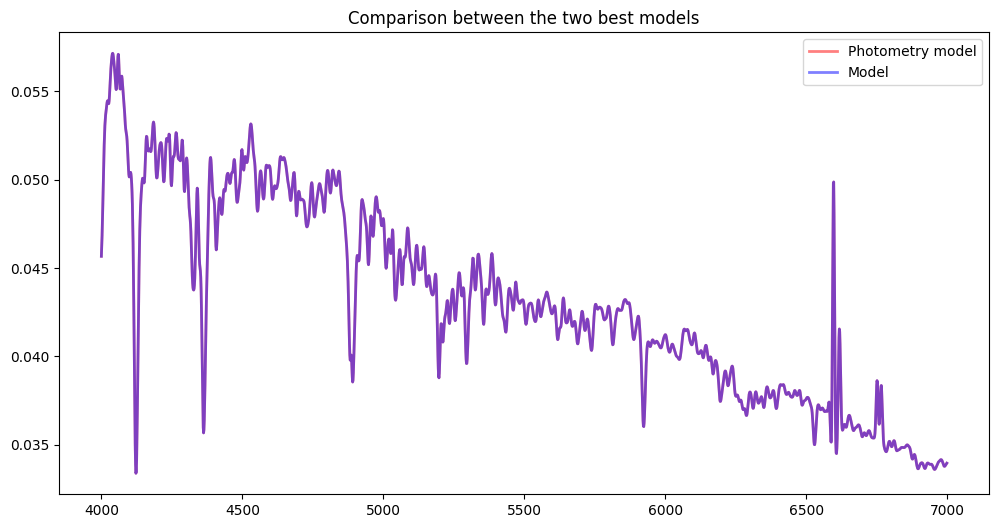

In [30]:
plt.figure(figsize=(12,6))
plt.plot (modwave.flatten(), consts[ind_min]*best_spec_phot.flatten(), c='red', alpha=0.5, label='Photometry model', linewidth=2)
plt.plot (modwave.flatten(), consts[best]*best_spec.flatten(), c='blue', alpha=0.5, label='Model', linewidth=2)
plt.title ('Comparison between the two best models')
plt.legend()
plt.show()